## тут есть обрезание прыжков мыши, показана проблема с 4 мышью

есть функция, измененяющая координаты мыши так, чтобы первая точка была в 0

графики тайм серий x и y

автокорелляция x у всех мышей апрель

автокорелляция фильтрованной скорости и рандома

показано, что мышь 9.2 засела на 1 месте

построены карты оккупации нормализация логарифм, минмах - для всех мышь и усредненная

аналогично построены карты дивергенции для каждой мыши и средняя


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import signal
import statsmodels.api as sm

from utils.processing import (
    open_file,
    cut_jumps,
)

In [2]:
def df_minmax(occ, show=True):
    if isinstance(occ, pd.DataFrame):
        occ = occ.to_numpy()
    kk = (occ - np.amin(occ)) / (np.amax(occ) - np.amin(occ))
    kl = pd.DataFrame(kk)
    if show:
        sns.heatmap(kl, square=True, xticklabels=False, yticklabels=False)
        plt.show()
    return kl

In [31]:
def occupMapNorm(df, binn, eps=0.1):
    """ 
    делаем df где будет понятно сколько было точек в каждом бине 
    соответсвуеющему данному интервалу х и данному интервалу у
    """
    xmin = df["x"].min() - eps
    xmax = df["x"].max() + eps
    binx = np.linspace(xmin, xmax, binn)
    x_cut = pd.cut(df.x, binx, right=False)

    ymin = df["y"].min() - eps
    ymax = df["y"].max() + eps
    biny = np.linspace(ymin, ymax, binn)
    y_cut = pd.cut(df.y, biny, right=False)

    dfn = df.groupby([x_cut, y_cut]).count()
    
    print('x_cut.isnull().values.any(), y_cut.isnull().values.any()')
    print(x_cut.isnull().values.any(), y_cut.isnull().values.any())
    
    dfn = dfn.drop(columns=['x','y'])
    dfn = dfn.rename(columns={'time': 'Count'})
    
    #сделаем df с норм числами в индексах, а не с интервалами
    L = [(a.mid, b.mid) for a, b in dfn.index]
    dfm = dfn.set_index(pd.MultiIndex.from_tuples(L, names=dfn.index.names))
    
    dd = dfm.unstack()
    arrd = dd.replace(0, 1e-2).to_numpy()
    arrl = np.log(arrd)

    # arrsrsr = np.sqrt(np.sqrt(np.sqrt(arrd)))
    #sns.heatmap(arrl, square=True)
    arrl = df_minmax(arrl)
    #sns.heatmap(arrl, square=True, xticklabels=False, yticklabels=False)
    #plt.show()

    return arrl

### Загрузка траекторий

In [7]:
def open_preprocessed_data(fname):
    import pickle
    with open(fname, 'rb') as inp:
        sub_trajs_list = pickle.load(inp)
    return sub_trajs_list

# Open pre-processed files (or use preproc functions for raw data)
PATH = 'preprocessed_dataset/'
dfs_names = ['tr11', 'tr12', 'tr2','tr3','tr4','tr5','tr6','tr7', 'tr91','tr92']

df_dict_subtraj = {}
for tr_name in dfs_names:
    tr = open_preprocessed_data(PATH + tr_name + '.pkl')
    df_dict_subtraj[tr_name] = tr

df_dict = {}
for k, df in df_dict_subtraj.items():
    df_dict[k] = pd.concat(df)

## If raw dataset:
# 1. cut_jumps;
# 2. rescale x and y coords to fit area size 
# 3. divide trajectories into sub-trajectories to remove inconsistent dt and Nans
# 4. resample to required dt

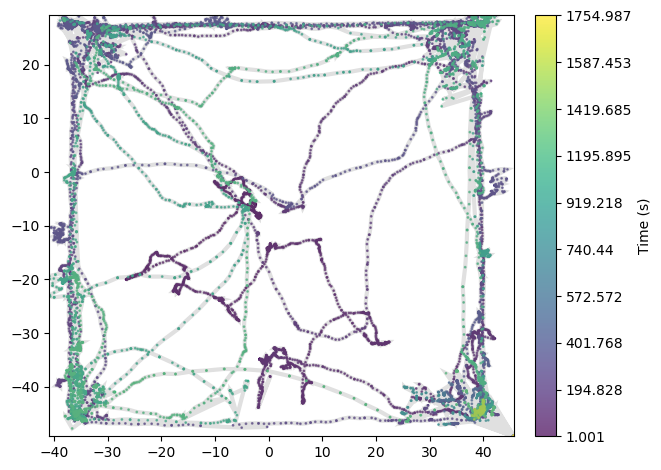

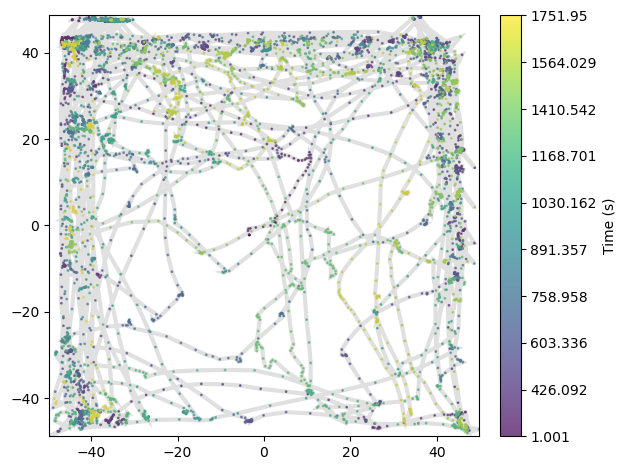

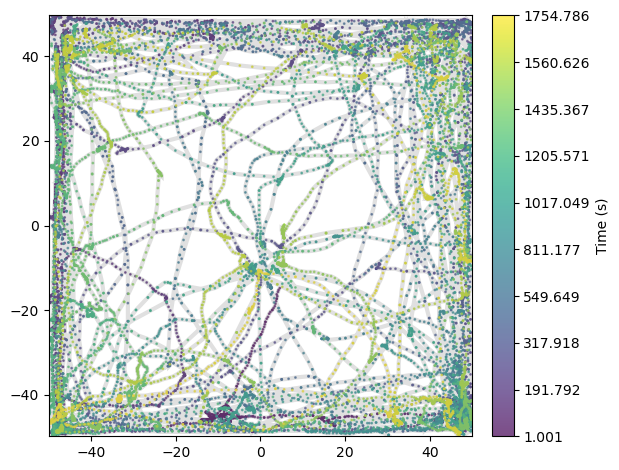

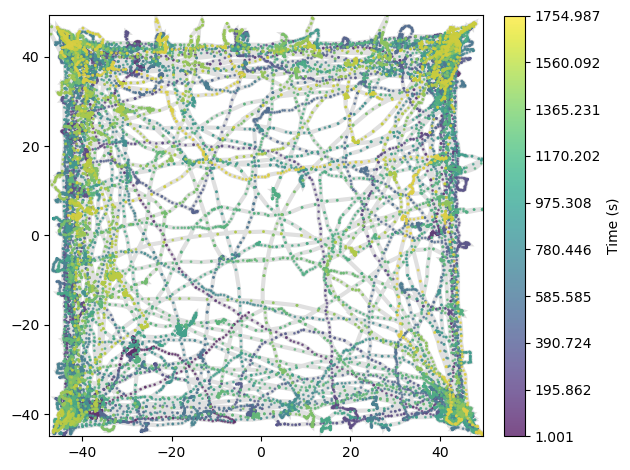

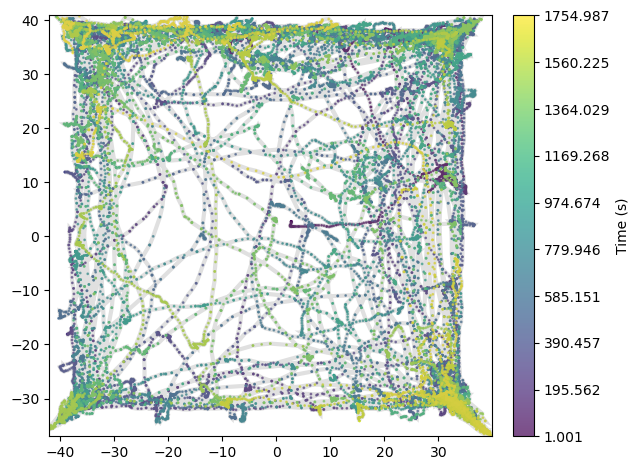

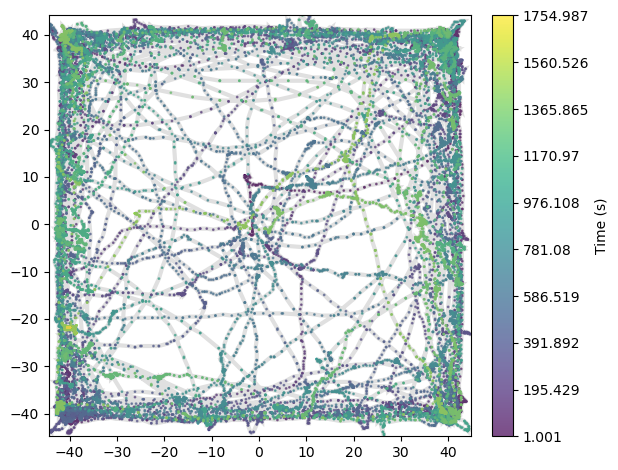

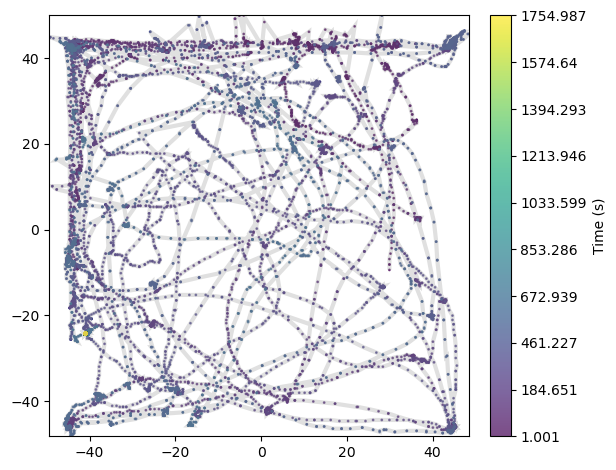

In [6]:
# tr4 = openFile('Trace_4.txt')
# tr3 = openFile('Trace_3.txt')
# tr5 = openFile('Trace_5.txt')
# tr6 = openFile('Trace_6.txt')
# tr7 = openFile('Trace_7.txt')
# tr91 = openFile('Trace_9.1.txt')
# tr92 = openFile('Trace_9.2.txt')

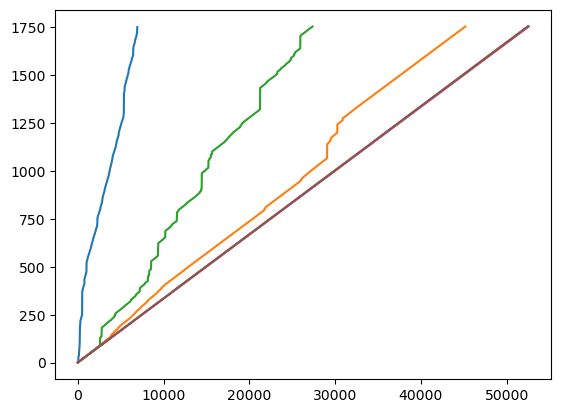

In [8]:
# #до вырезанных прыжков
# plt.plot(tr3['time'])
# plt.plot(tr4['time'])
# plt.plot(tr5['time'])
# plt.plot(tr6['time'])
# plt.plot(tr7['time'])
# plt.plot(tr91['time'])

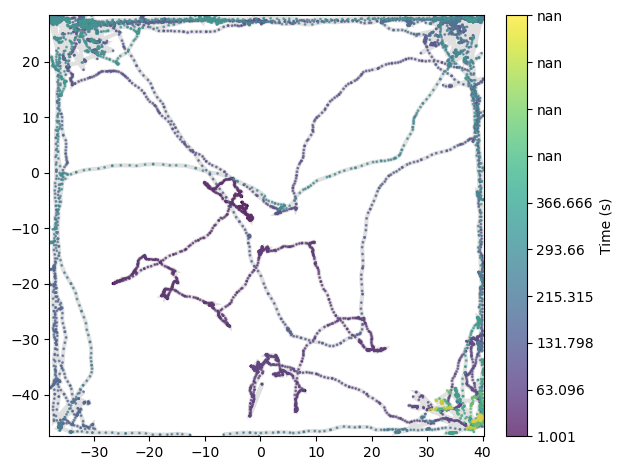

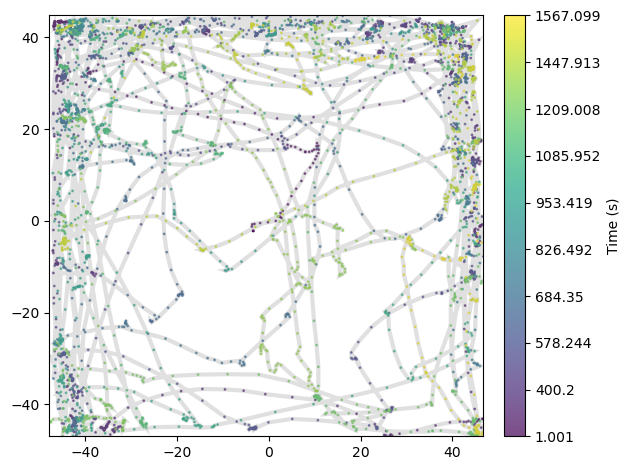

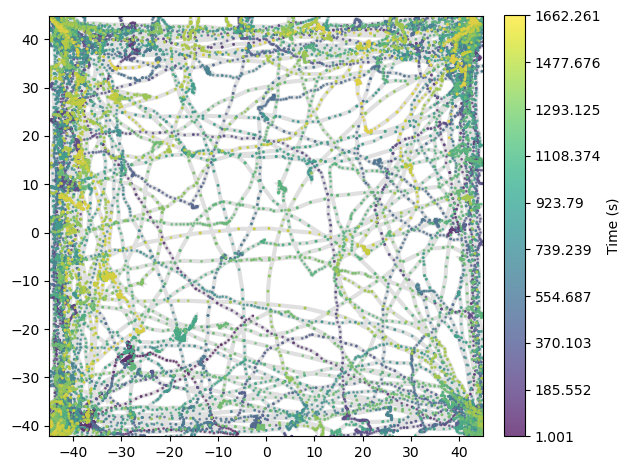

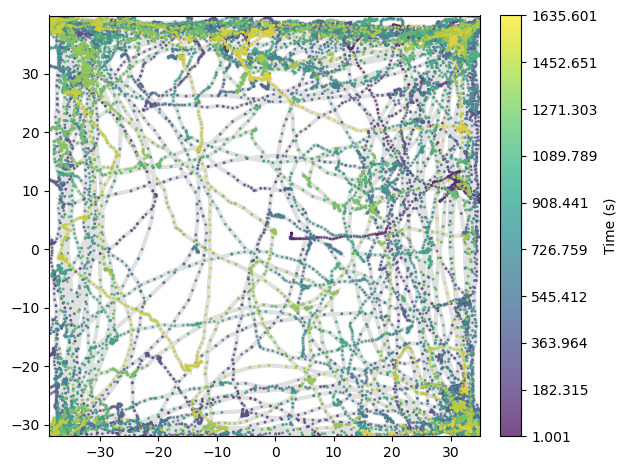

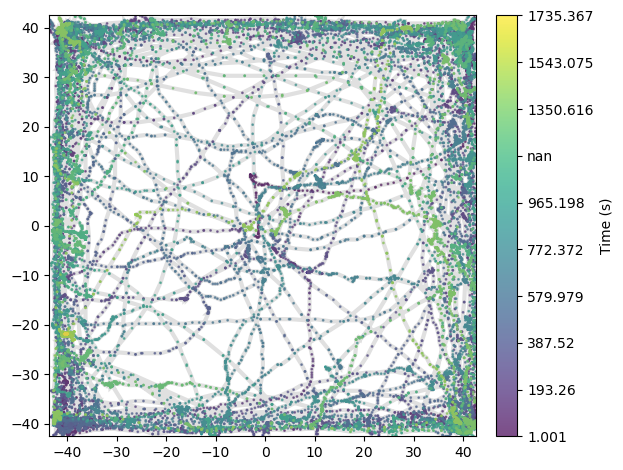

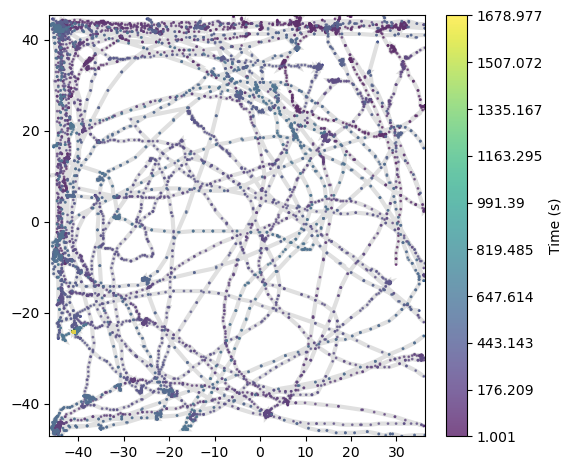

In [9]:
# tr4 = cutjump(tr4, xmax=40.4, xmin=-38.1, ymax=28.3, ymin=-47.6)
# tr3 = cutjump(tr3, xmax=46.8, xmin=-48, ymax=46, ymin=-47)
# tr6 = cutjump(tr6, xmax=45, xmin=-45, ymax=45, ymin=-42.2)
# tr7 = cutjump(tr7, xmax=35, xmin=-38.7, ymax=40, ymin=-32)
# tr91 = cutjump(tr91, xmax=42.5, xmin=-43.7, ymax=42.5, ymin=-42.7)
# tr92 = cutjump(tr92, xmax=36.3, xmin=-46.5, ymax=45.4, ymin=-47.3)

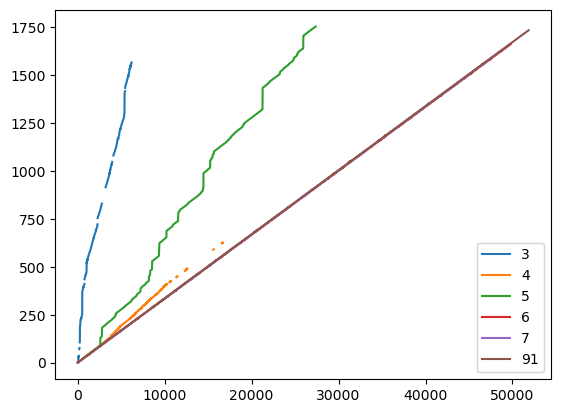

In [10]:
# #после вырезания прыжков
# plt.plot(tr3['time'], label='3')
# plt.plot(tr4['time'], label='4')
# plt.plot(tr5['time'], label='5')
# plt.plot(tr6['time'], label='6')
# plt.plot(tr7['time'], label='7')
# plt.plot(tr91['time'], label='91')
# plt.legend()

#### Пусть первая точка будет (0, 0)

In [27]:
def centralize_starting_point(tr):
    tr['x'] = tr['x'] - tr['x'].iloc[0]
    tr['y'] = tr['y'] - tr['y'].iloc[0]
    return tr
    
cent_df_dict = {}
for k, df in df_dict.items():
    cent_df_dict[k] = centralize_starting_point(df)
    
    # print(k , '-------'*10)
    # print('x: ', cent_df['x'].min(), cent_df['x'].max())
    # print('y: ', cent_df['y'].min(), cent_df['y'].max())
    # print('len x: ', cent_df['x'].max() - cent_df['x'].min())
    # print('len y: ', cent_df['y'].max() - cent_df['y'].min())

In [13]:
# alltr = [tr4, tr3, tr5, tr6, tr7, tr91]

In [14]:
# for i in alltr:
#     i = X0Y0(i)

In [32]:
# for i in alltr:
#     print(i['x'].max(), i['x'].min(), i['y'].max(), i['y'].min())

In [29]:
# for i in alltr:
#     print(i['x'].max() - i['x'].min(), i['y'].max() - i['y'].min())

### Графики тайм серий x и y

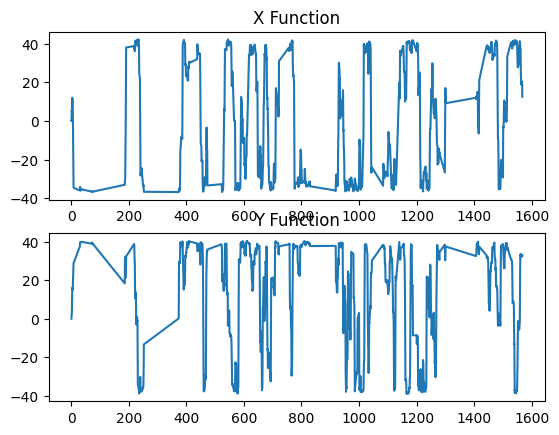

In [28]:
## For 3rd trajectory we can see gaps in trajectory 
df = cent_df_dict['tr3']

figure, axis = plt.subplots(2, 1)
axis[0].plot(df['time'], df['x'])
axis[0].set_title("X Function")
  
# For Cosine Function
axis[1].plot(df['time'], df['y'])
axis[1].set_title("Y Function")
plt.show()

## автокорелляция х у всех мышей апрель

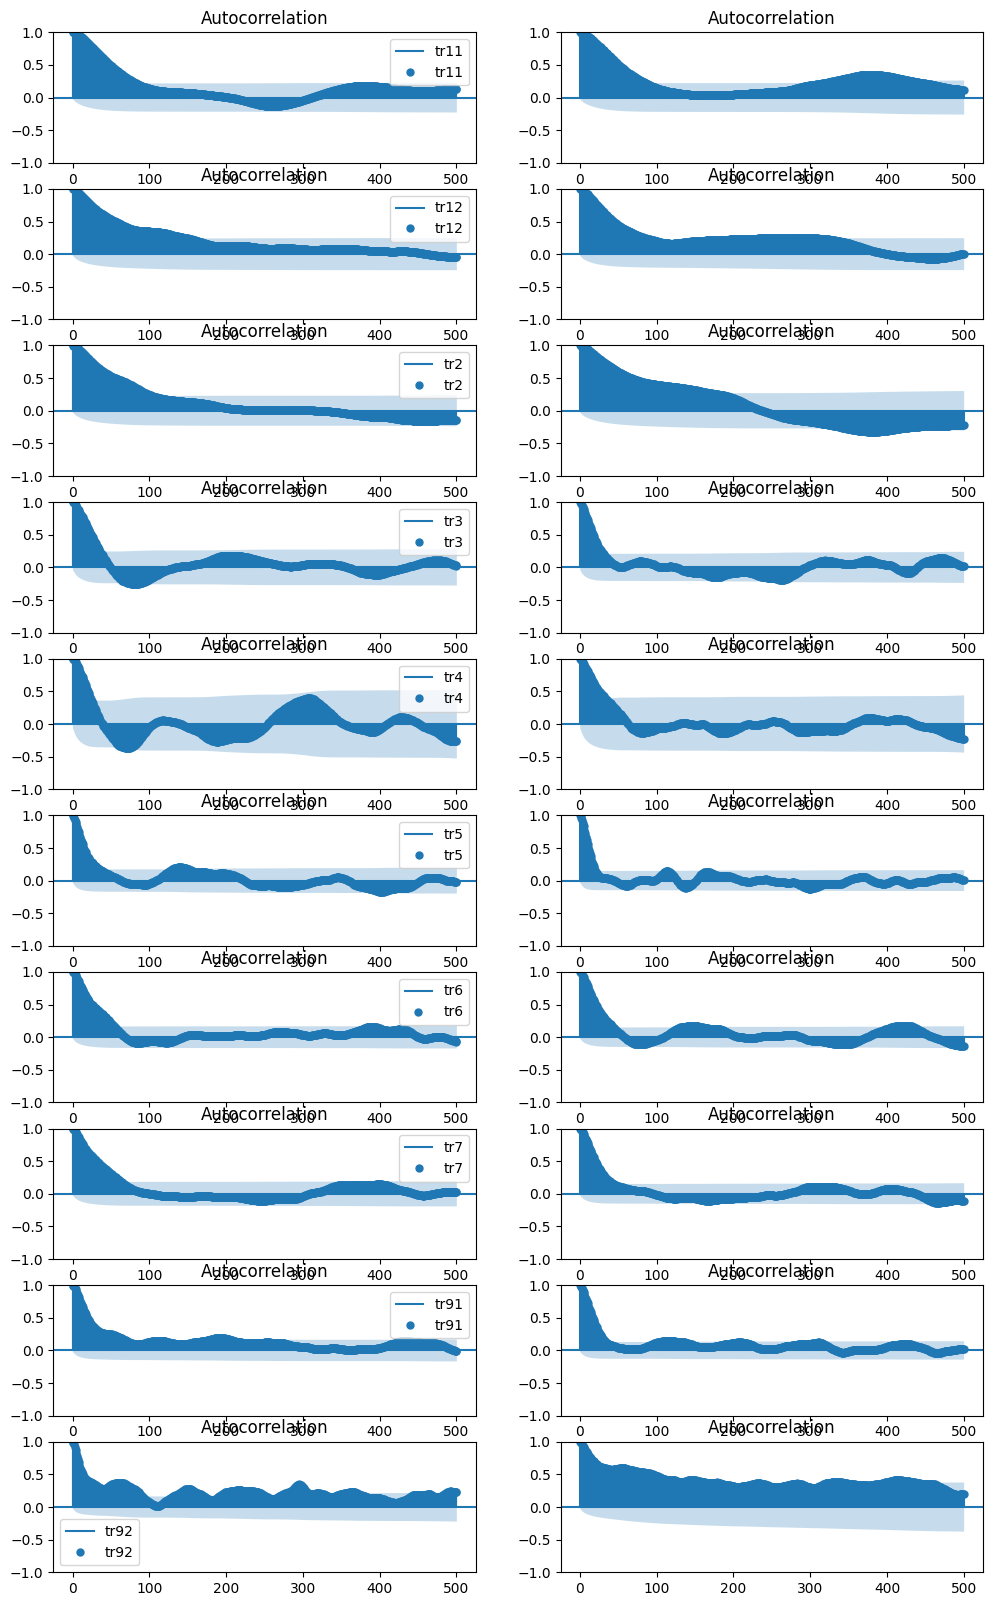

In [52]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# TODO: try different lags!
LAGS_NUM = 500   # TODO: to config

fig, axes = plt.subplots(len(df_dict), 2, figsize=(12, 20))
i = 0
for k, df in df_dict.items():
    if df.shape[0] <= LAGS_NUM:
        continue
    else:
        plot_acf(df['x'].to_numpy(), lags=LAGS_NUM, ax=axes[i, 0], label=k)
        plot_acf(df['y'].to_numpy(), lags=LAGS_NUM, ax=axes[i, 1])
        axes[i, 0].legend()
        i += 1
plt.show()

## NOTE: How to interpret what we have?
# https://www.alpharithms.com/autocorrelation-time-series-python-432909/

## NOTE: Trajectories with gaps should be carefully interpreted! 
# Since acf is time series correlation and trajs with recording gaps  

### acf of filtered Velocity

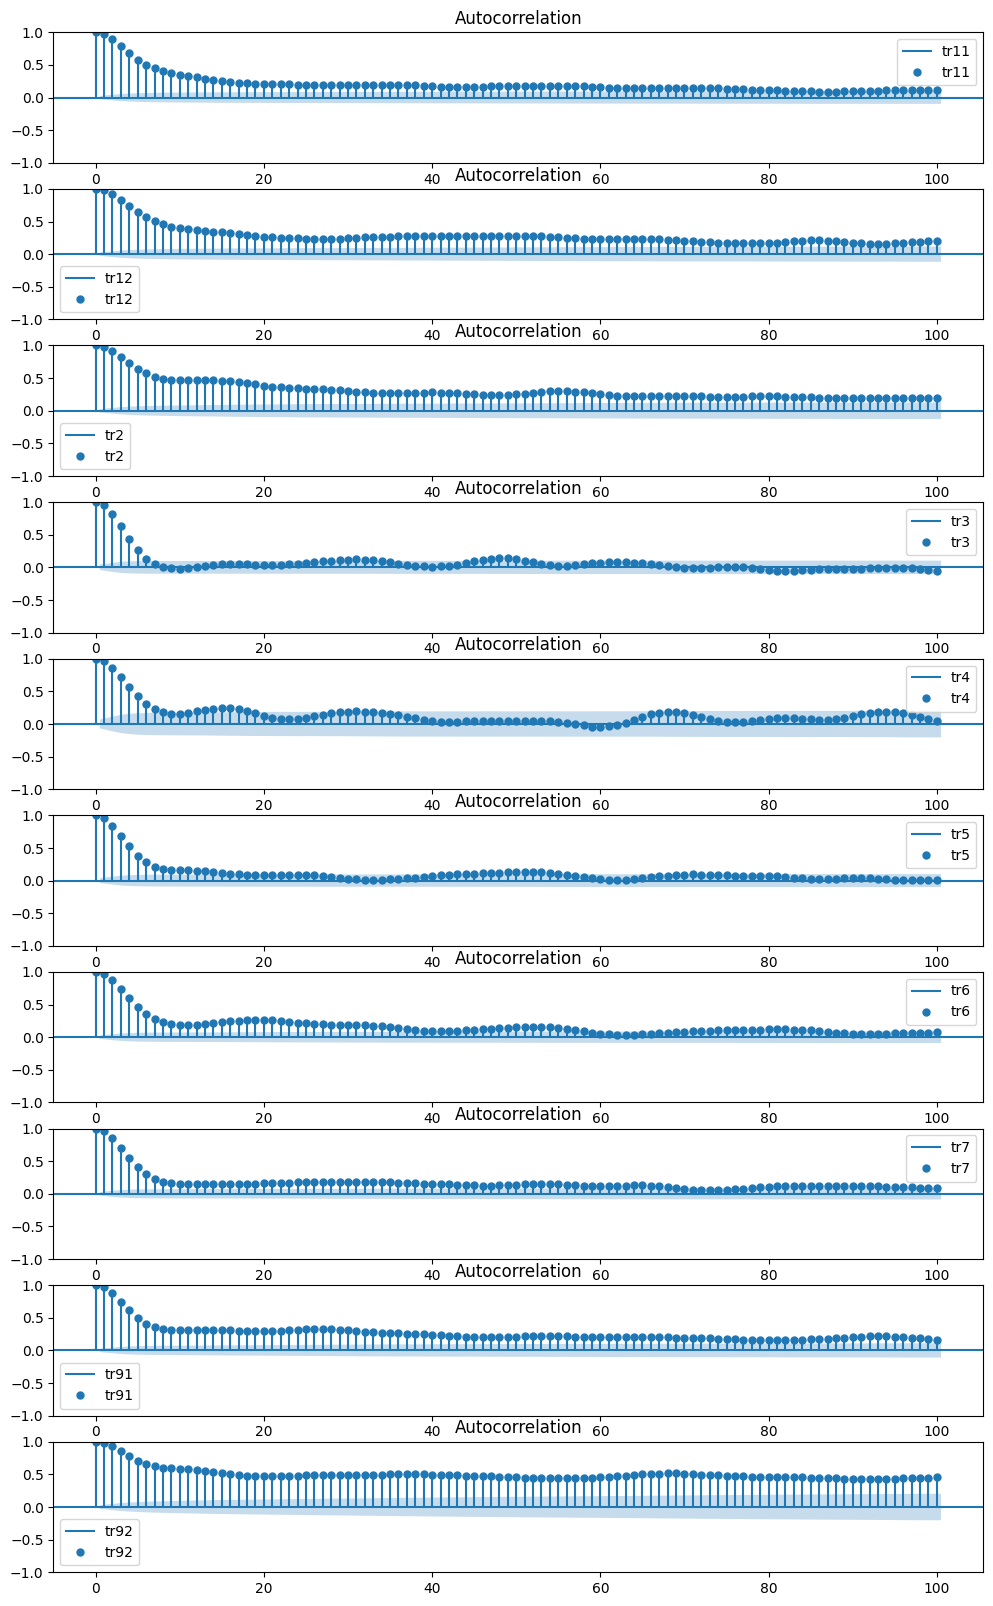

In [59]:
def add_filtered_V(df, smooth_kern=None):
    from scipy.ndimage import gaussian_filter1d
    dt = df['time'].diff()
    vx = df['x'].diff() / dt
    vy = df['y'].diff() / dt
    v = (vx**2 + vy**2)**0.5

    dt[0], vx[0], vy[0] = 0., 0., 0.
    v[0] = 0.
    if smooth_kern:
        vx = gaussian_filter1d(vx, smooth_kern)
        vy = gaussian_filter1d(vy, smooth_kern)
        v = gaussian_filter1d(v, smooth_kern)
    df['Vx'] = vx
    df['Vy'] = vy
    df['V'] = v
    df['Vx'].iloc[0] = 0.
    df['Vy'].iloc[0] = 0.
    df['V'].iloc[0] = 0.
    return df


# TODO: try different lags!
LAGS_NUM = 100   # TODO: to config

fig, axes = plt.subplots(len(df_dict), 1, figsize=(12, 20))
i = 0
for k, df in df_dict.items():
    if df.shape[0] <= LAGS_NUM:
        continue
    else:
        df_V = add_filtered_V(df, smooth_kern=None)
        plot_acf(df['V'].to_numpy(), lags=LAGS_NUM, ax=axes[i], label=k)
        axes[i].legend()
        i += 1
plt.show()

## NOTE: How to interpret what we have?
# https://www.alpharithms.com/autocorrelation-time-series-python-432909/

## NOTE: Trajectories with gaps should be carefully interpreted! 
# Since acf is time series correlation and trajs with recording gaps  

#### Строим карты оккупации со шкалой от 0 до 1

In [72]:
def df_minmax(occ):
    if isinstance(occ, pd.DataFrame):
        occ = occ.to_numpy()
    kk = (occ - np.amin(occ)) / (np.amax(occ) - np.amin(occ))
    kl = pd.DataFrame(kk)
    return kl

def occupMapNorm(df, binn, eps=0.1):
    """ 
    делаем df где будет понятно сколько было точек в каждом бине 
    соответсвуеющему данному интервалу х и данному интервалу у
    """
    xmin = df["x"].min() - eps
    xmax = df["x"].max() + eps
    binx = np.linspace(xmin, xmax, binn)
    x_cut = pd.cut(df.x, binx, right=False)

    ymin = df["y"].min() - eps
    ymax = df["y"].max() + eps
    biny = np.linspace(ymin, ymax, binn)
    y_cut = pd.cut(df.y, biny, right=False)

    dfn = df.groupby([x_cut, y_cut], observed=False).count()
    
    dfn = dfn.drop(columns=['x','y'])
    dfn = dfn.rename(columns={'time': 'Count'})
    
    #сделаем df с норм числами в индексах, а не с интервалами
    L = [(a.mid, b.mid) for a, b in dfn.index]
    dfm = dfn.set_index(pd.MultiIndex.from_tuples(L, names=dfn.index.names))
    
    dd = dfm.unstack()
    arrd = dd.replace(0., 1e-2).to_numpy()
    arrl = np.log(arrd)

    arrl = df_minmax(arrl)
    return arrl

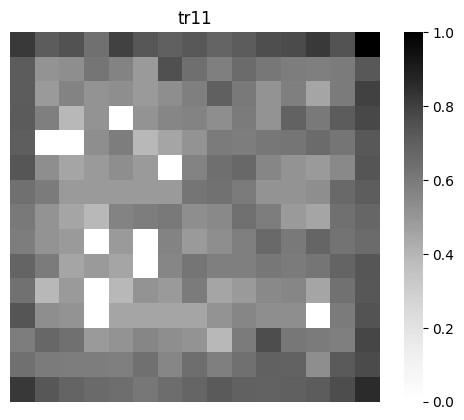

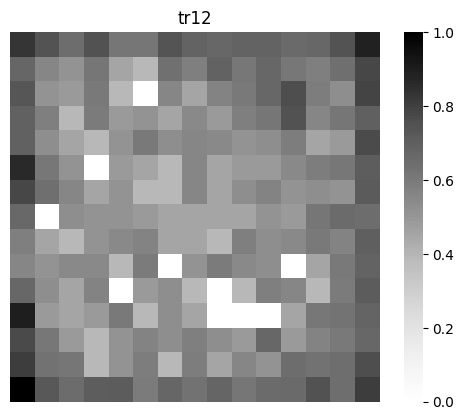

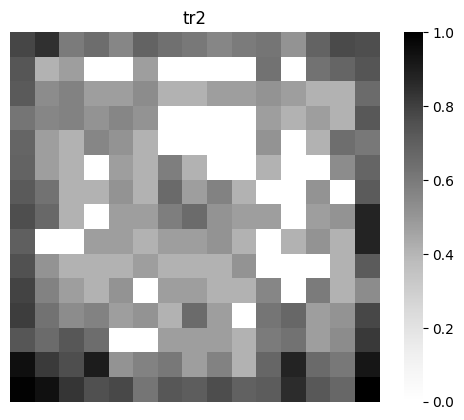

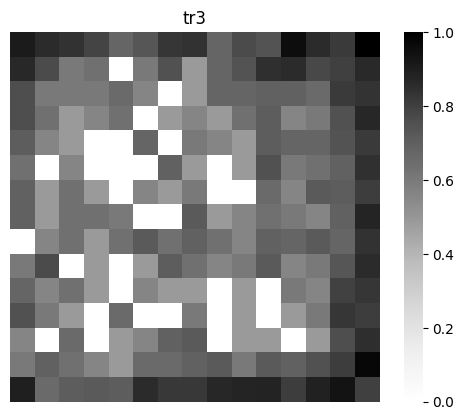

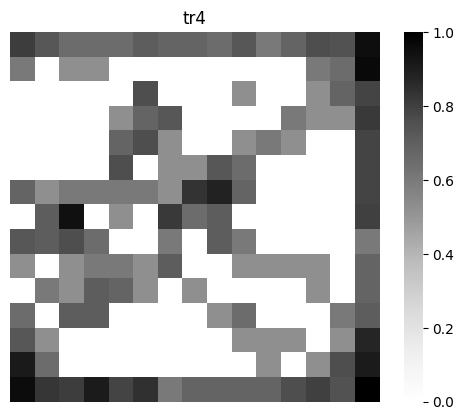

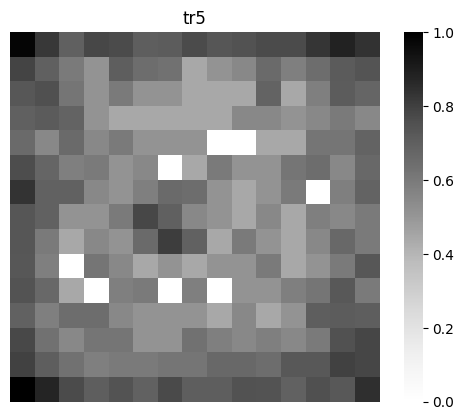

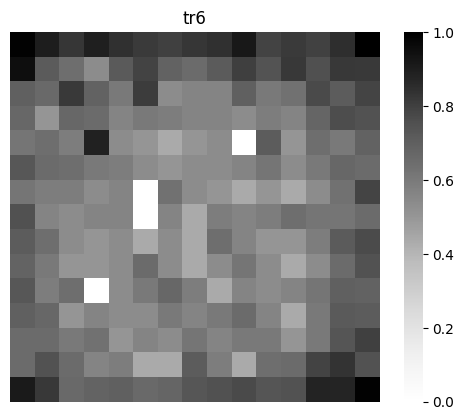

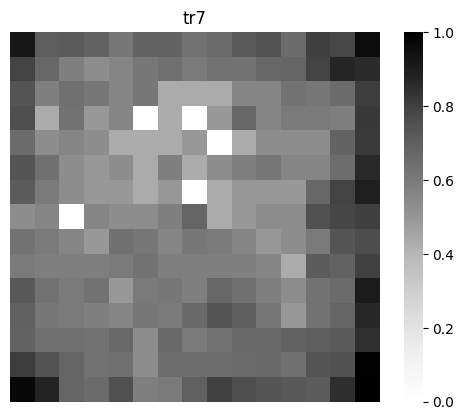

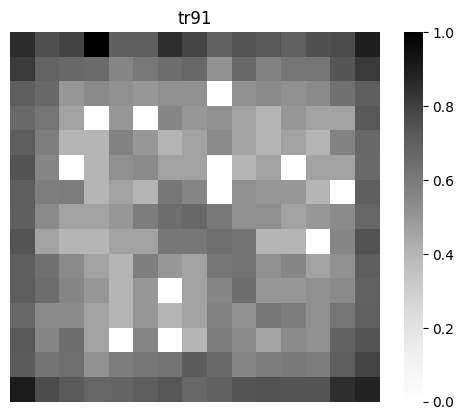

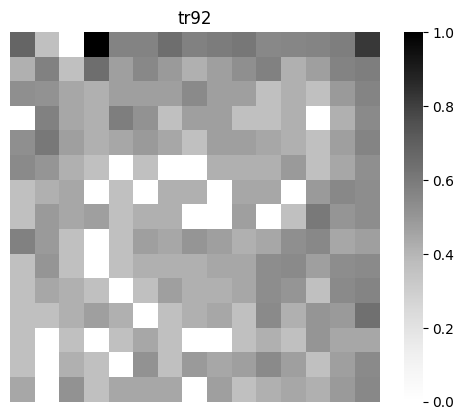

In [78]:
occ_dict = {}
for k, df in df_dict.items():
    df_copy = df[['time', 'x', 'y']]
    occ = occupMapNorm(df_copy, binn=16)
    occ_dict[k] = occ
    sns.heatmap(occ, square=True, xticklabels=False,
                yticklabels=False, cmap='Greys')
    plt.title(k)
    plt.show()

## Average occupancy scores

In [ ]:
for k, df in occ_dict.items():
    pass # STOPPED HERE! -=-----------------------------------

<AxesSubplot:>

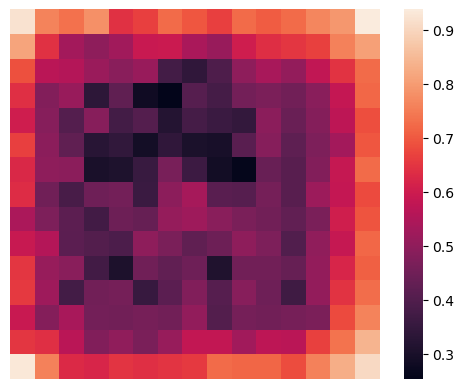

In [47]:
occMean = np.mean( np.array([ occ3, occ5, occ6, occ7, occ91]), axis=0 )
sns.heatmap(occMean, square=True, xticklabels=False, yticklabels=False)
#блин тут другая ось справа... мб стоит нормализовать. и это странно, среднее значение числел до 1 не мб больше 1

### Divergency all mice

In [53]:
def divMap(df, n):
    ind = range(0, len(df))
    df = df.reindex(ind)
    vx = []
    vy = []
    div = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            div.append(0)
        elif (df['x'][i]-df['x'][i-1])==0 or (df['y'][i]-df['y'][i-1])==0:
            vx.append((df['x'][i]-df['x'][i-1])/(df['time'][i]-df['time'][i-1]))
            vy.append((df['y'][i]-df['y'][i-1])/(df['time'][i]-df['time'][i-1]))
            div.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vx.append(vvx)
            vy.append(vvy)
            div.append(vvx/dx + vvy/dy)
    
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "divergence", div)
    binx = np.linspace(df["x"].min(), df["x"].max(), n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfn = pd.DataFrame(dfn.loc[:, 'divergence'])
    dfn = dfn.unstack()
    #заменим nan на 0
    dfn = dfn.fillna(0)
    #зашьем в керл минмакс
    dfn = minmax(dfn)
    #sns.heatmap(dfn, robust=False, square=True, xticklabels=False, yticklabels=False)
    return dfn

In [68]:
%matplotlib inline

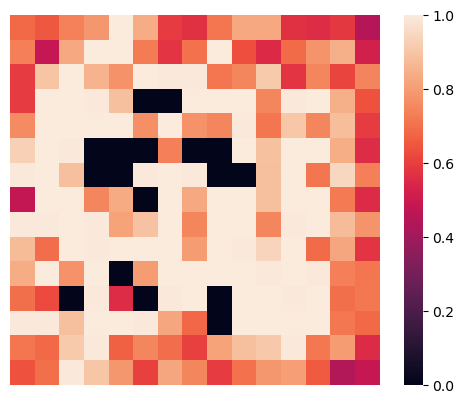

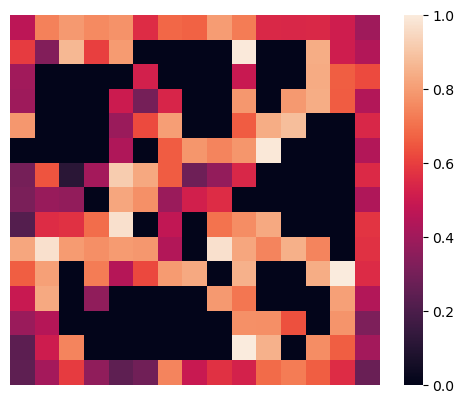

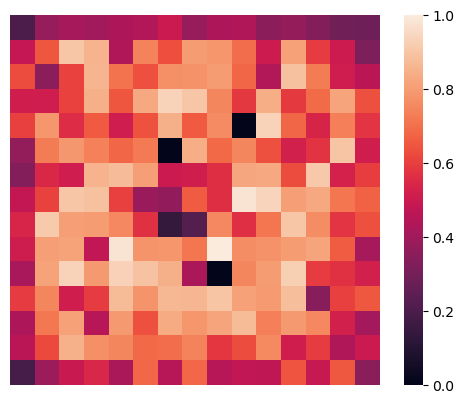

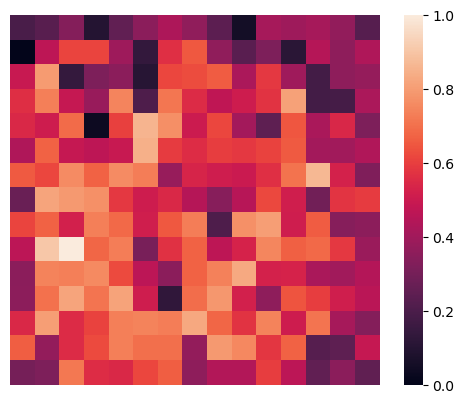

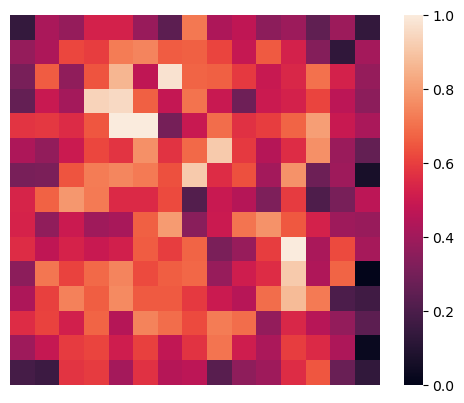

NameError: name 'tr9' is not defined

In [56]:
div3 = divMap(tr3, 15)
div4 = divMap(tr4, 15)
div5 = divMap(tr5, 15)
div6 = divMap(tr6, 15)
div7 = divMap(tr7, 15)
div9 = divMap(tr9, 15)

<AxesSubplot:>

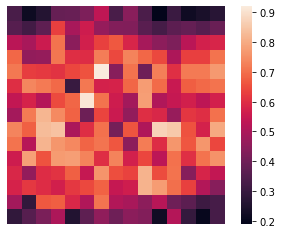

In [79]:
divMean = np.mean( np.array([ div3, div4, div5, div6, div7, div9]), axis=0 )
sns.heatmap(divMean, square=True, xticklabels=False, yticklabels=False)